<h1 style="text-align: center">
<div style="color: #DD3403; font-size: 60%">Data Science DISCOVERY MicroProject</div>
<span style="">MicroProject #10: Chess and The Elo System</span>
<div style="font-size: 60%;"><a href="https://discovery.cs.illinois.edu/microproject/chess/">https://discovery.cs.illinois.edu/microproject/chess/</a></div>
</h1>

<hr style="color: #DD3403;">

## Data Source: Lichess.org Open Database

The website [lichess.com](https://lichess.org) is an open source and free platform for playing chess online.  As part of their website, lichess provides the ["lichess.org open database"](https://database.lichess.org/) that contains an absolutely massive number of chess games, puzzles, and engine evaluations. Billions of games are stored in the database with about a hundred million being added each month.

In this MicroProject, you will analyze a small collection of the data and explore using Python functions to evaluate the Elo system and check the accuracy and efficacy of the Elo rating.  Let's nerd out! 🎉


### Background Knowledge

To finish this MicroProject, we assume you already know:

- All topics covered in *DISCOVERY Module 1: Basics of Data Science with Python* ([review the module here](https://discovery.cs.illinois.edu/learn/))
- Working with functions in Python ([review Python functions here](https://discovery.cs.illinois.edu/learn/Simulation-and-Distributions/Functions-in-Python/))
- Writing simulations in Python ([review Python simulations here](https://discovery.cs.illinois.edu/learn/Simulation-and-Distributions/Simple-Simulations-in-Python/))

Let's get started! :)

<hr style="color: #DD3403;">

## Part 1: Importing the lichess.com Dataset

As part of this MicroProject, we have selected the 121,114 games played in January 2013, provided for you in the dataset `lichess_games_1-2013.csv` (218 games were excluded due to missing data).
Load the `lichess_games_1-2013.csv` dataset into a DataFrame stored in the Python variable `df`:

In [1]:
import pandas as pd
import numpy as np

df = pd.read_csv('lichess_games_1-2013.csv')
df

,WhiteElo,BlackElo,Result,Termination,Opening,ECO,TimeControl
0,1639,1403,1-0,Normal,French Defense: Normal Variation,C00,600+8
1,1654,1919,1-0,Normal,"Queen's Pawn Game: Colle System, Anti-Colle",D04,480+2
2,1643,1747,1-0,Normal,Four Knights Game: Italian Variation,C50,420+17
3,1824,1973,0-1,Normal,Caro-Kann Defense: Goldman Variation,B12,60+1
4,1765,1815,0-1,Normal,French Defense: La Bourdonnais Variation,C00,60+1
...,...,...,...,...,...,...,...
121109,1854,1937,0-1,Normal,King's Indian Defense: Saemisch Variation,E80,600+10
121110,1500,1266,0-1,Time forfeit,Scandinavian Defense,B01,720+0
121111,1431,1523,0-1,Normal,Scandinavian Defense: Mieses-Kotroc Variation,B01,960+6
121112,1693,1479,1-0,Normal,Barnes Defense,B00,180+1


### Data Dictionary: Understanding the Data

A chess game occurs between two players: one player who plays with the **white chess pieces** and a second player who plays with the **black chess pieces**.  Each player has a skill rating, called their "Elo rating", that measures their skill at the game of chess.

- The columns `WhiteElo` and `BlackElo` contain data about the ratings of each player before the game begins.

A chess match will always result in either the white pieces winning (represented by `1-0`, meaning that "white scored one point"), the black pieces winning (represented by `0-1`, meaning "black scored one point"), or a draw where neither player wins (represented by `1/2-1/2`, meaning both players scored a half-point).

- The column `Result` contains either `1-0`, `0-1`, or `1/2-1/2`.

To ensure a game of chess does not last forever, every chess match is played with a "time control".  The time control indicates the total number of seconds each player has for the entire game and how many additional seconds each player gets for each move played.  If a player runs out of time, they forfeit the game due to running out of time (called a `"Time forfeit"`).

- The column `TimeControl` indicates the time control for the game.  A time control of `60+1` indicates each player has **60 seconds** to play the entire game with an additional **1 second** for each moved played.
- The column `Termination` contains `"Normal"` for a normal game ending, or `"Time forfeit"` if a player runs out of time.

Finally, the first several moves of a chess game determines the overall "structure" of the game in high-level chess.  Each common sequence of initial moves are given a name (ex: "Queen's Gambit", "Scandinavian Defense", "Caro-Kann Defense", etc).  The opening used in each game and the three character code from [Encyclopaedia of Chess Openings](https://en.wikipedia.org/wiki/Encyclopaedia_of_Chess_Openings) for the opening is provided as part of this dataset.

- The column `Opening` contains the opening name.
- The column `ECO` contains the [Encyclopaedia of Chess Openings](https://en.wikipedia.org/wiki/Encyclopaedia_of_Chess_Openings) code for the opening.

<hr style="color: #DD3403;">

## Part 2: The Elo System

A player's Elo changes after each game, and the change depends on the Elo of the opponent. Someone who wins against a higher-rated player gains more Elo than if they win against a lower-rated player. This reflects the fact that a higher-rated player is considered more likely to win. But exactly how likely?

Suppose two players, A and B, are playing a game of chess. A simplified [Elo formula](https://en.wikipedia.org/wiki/Elo_rating_system#Mathematical_details) for the probability that A wins is:
$$P(\text{A wins}) = \frac{1}{1 + 10^{(-r/400)}}$$
where $$r = \text{A's Elo} - \text{B's Elo}$$


### Example Calculation

For example, if A has an Elo of 1000 and B has an Elo of 1200:

$$r = \text{A's Elo} - \text{B's Elo}$$
$$r = \text{1000} - \text{1200}$$
$$r = -200$$

Then, solving for the probability:

$$P(\text{A wins}) = \frac{1}{1 + 10^{(-r/400)}}$$
$$P(\text{A wins}) = \frac{1}{1 + 10^{(-(-200)/400)}}$$
$$P(\text{A wins}) = 0.2403 = 24.03\%$$

It makes sense that A has a low chance of winning, since they are rated 200 points lower than B.


### Simplified Formula Assumption

This formula assumes that there are only two results: A wins or B wins. [A more complicated formula](https://en.wikipedia.org/wiki/Elo_rating_system#Formal_derivation_for_win/draw/loss_games) accounts for draws, but we won't use it here.

This means that for this MicroProject (and any time you cannot have a tie in an Elo system):

$$P(\text{B wins}) = 1 - P(\text{A wins})$$

### Part 2.1: Probability of Winning Formula

Create a function `p_A_wins` that takes two arguments, `elo_A` and `elo_B`, and returns the probability that player A wins using the formula outlined earlier:

In [6]:
def p_A_wins(elo_A, elo_B):
    r = elo_A - elo_B
    return 1 / (1 + 10 ** (-r / 400))
    

Keep in mind that the formula from this section is a very rough approximation. In reality, the probability of winning is affected by many factors, such as whether the player is playing white or black, the time control, and whether their current Elo truly reflects their skill level.

In [7]:
### TEST CASE for Part 2.1: Probability of Winning Formula
import math
tada = "\N{PARTY POPPER}"

assert("p_A_wins" in vars()), "Make sure to define the function `p_A_wins`."
assert(math.isclose(p_A_wins(2000, 2000), 0.5)), "Your function does not return the correct probability."
assert(math.isclose(p_A_wins(1000, 1200), 0.2402530733520421)), "Your function does not return the correct probability."
assert(math.isclose(p_A_wins(1000, 2000), 0.0031523091832602115)), "Your function does not return the correct probability."
assert(math.isclose(p_A_wins(1500, 1200), 0.8490204427886767)), "Your function does not return the correct probability."
print(f"{tada} All Tests Passed! {tada}") 

🎉 All Tests Passed! 🎉


### Part 2.2: Applying Your Elo Formula

A major [chess cheating scandal](https://en.wikipedia.org/wiki/Carlsen%E2%80%93Niemann_controversy) in 2022 had a previous World Champion, Magnus Carlsen, accusing his opponent Hans Niemann of cheating after [losing to him](https://www.chess.com/events/2022-sinquefield-cup/03/Carlsen_Magnus-Niemann_Hans_Moke).

At the time, Hans Niemann had an Elo of 2688, and Magnus Carlsen had an Elo of 2861. Use your function to estimate the probability of Hans Niemann winning and store that probability in the variable `p_Hans_wins`:

In [8]:
p_Hans_wins = p_A_wins(2688, 2861)
p_Hans_wins

0.269754586702576

In [9]:
### TEST CASE for Part 2.2: Applying Your Elo Formula
import math
tada = "\N{PARTY POPPER}"

assert("p_Hans_wins" in vars()), "Make sure to define the variable `p_Hans_wins`."
assert(not math.isclose(p_Hans_wins, 0.730245413297424)), "Your value for p_Hans_wins is incorrect. Remember that your function returns the probability of the first player winning."
assert(math.isclose(p_Hans_wins, 0.269754586702576)), "Your value for p_Hans_wins is incorrect."

print(f"{tada} All Tests Passed! {tada}") 

🎉 All Tests Passed! 🎉


### Part 2.3: Your Elo

Let's take a look at your probabilities of winning against different opponents!
- If you have a chess Elo, put it in the variable `your_elo`.
- If you don't have an Elo, feel free to use `1200` or another reasonable value.  *(An Elo of `500` would represent someone who understands the rules of chess, but uses very little strategy; an Elo of `1200` might be someone who plays recreationally; and an Elo of `2000` begins to be range of players who play professionally.)*

In [12]:
your_elo = 300
your_elo

300

The lowest possible Elo on Lichess is 400. Calculate the probability of winning against a player with that Elo (use the variable your_elo that you defined above).

In [13]:
p_win_400 = p_A_wins(your_elo, 400)
p_win_400

0.35993500019711494

Two equally rated players should have an exactly 50% chance of winning.  Let's verify this by calculating the probability of winning when you play a game against someone with **the exact same Elo rating as yourself**:

In [15]:
p_win_yourself = p_A_wins(your_elo, 300)
p_win_yourself

0.5

### Part 2.4: Average Elo

Now calculate the average Elo of every playing in the dataset. Make sure to include both white and black players.

*Hint: There are exactly as many white players as black players in the dataset, so you can average the two means.*

In [32]:
average_elo = (df['WhiteElo'].mean() + df['BlackElo'].mean()) / 2
average_elo

np.float64(1600.8983024258137)

Now calculate the probability of winning against a player with the average Elo.

In [33]:
p_win_average_elo = p_A_wins(your_elo, average_elo)
p_win_average_elo

np.float64(0.0005591281395146847)

The highest Elo ever reached by a human was **2882** by Magnus Carlsen in 2014. Calculate the probability of winning against Magnus Carlsen at his peak.

In [34]:
p_win_magnus = p_A_wins(your_elo, 2882)
p_win_magnus

3.50751750925734e-07

In [35]:
### TEST CASE for Part 2.3 and Part 2.4: Elo Calculations

_p = lambda a, b: 1 / (1 + 10 ** ((b - a) / 400))

assert("your_elo" in vars()), "Make sure to define the variable `your_elo`."
assert(100 < your_elo < 3000), "Your Elo is not in a reasonable range."
assert("p_win_400" in vars()), "Make sure to define the variable `p_win_400`."
assert(math.isclose(p_win_400, _p(your_elo, 400))), "Your value for p_win_400 is incorrect."
assert("average_elo" in vars()), "Make sure to define the variable `average_elo`."
assert(math.isclose(average_elo, 1600.8983024258137)), "Your value for average_elo is incorrect."
assert("p_win_yourself" in vars()), "Make sure to define the variable `p_win_yourself`."
assert(math.isclose(p_win_yourself, 0.5)), "Your value for p_win_yourself is incorrect."
assert("p_win_average_elo" in vars()), "Make sure to define the variable `p_win_average_elo`."
assert(math.isclose(p_win_average_elo, _p(your_elo, average_elo))), "Your value for p_win_average_elo is incorrect."
assert("p_win_magnus" in vars()), "Make sure to define the variable `p_win_magnus`."
assert(math.isclose(p_win_magnus, _p(your_elo, 2882))), "Your value for p_win_magnus is incorrect."

print(f"{tada} All Tests Passed! {tada}") 

🎉 All Tests Passed! 🎉


### Part 2.5: Plotting Your Winning Chances

We've looked at a few different win probabilities. Now let's plot a bunch of different ones to see how the probability changes with Elo!

Create a DataFrame called `df_win_prob` with the columns `Elo` and `p_win`.
- You should consider all values of Elo from 400 to 2900 (inclusive).
- The `p_win` column should contain the probability of you winning against a player with that Elo.

**Creating this can be done in a way very similar to a simulation**, where you are recording every possible Elo value (in our specified range) and are calculating the probability of winning against each Elo value given your own Elo value.  

It may be useful to use the two-argument `range` function in Python.  Traditionally, we usually use the one-argument `range` function that starts at `0` and stops at the number you specify.  For example, `range(100)` starts at `0`, stops at `100` and includes all the numbers `0...99`.

```py
for i in range(100):
  print(i)
# Result: 0  1  2  ...  98  99
```

Using the two argument `range` function, you specify the **start** and the **stop**.  If we want to start at `42` instead of `0`, the following code starts at `42` instead of the default of `0`:

```py
for i in range(42, 100):
  print(i)
# Result: 42  43  44  ...  98  99
```

It may be useful to do something like this for your `Elo`, similar to:

```py
for Elo in range(10, 20):
  print(Elo)
# Result: 10  11  12  ...  18  19
```

Create a DataFrame called `df_win_prob` that considers the probability of you winning for every Elo in the range `400..2900`, with the columns `Elo` and `p_win`:

In [43]:
# Create a DataFrame called `df_win_prob` that considers the probability of you
# winning for every Elo in the range `400..2900`:
elo_list = []
p_win_list = []
for Elo in range(400, 2901):
    elo_list.append(Elo)
    p_win_list.append(p_A_wins(your_elo, Elo))
df_win_prob = pd.DataFrame({'Elo': elo_list, 'p_win': p_win_list
})
    

df_win_prob

,Elo,p_win
0,400,3.599350e-01
1,401,3.586099e-01
2,402,3.572869e-01
3,403,3.559661e-01
4,404,3.546475e-01
...,...,...
2496,2896,3.235936e-07
2497,2897,3.217361e-07
2498,2898,3.198894e-07
2499,2899,3.180533e-07


Using `df_win_prob` and `plot.line`, plot a line chart.  The x-axis should be `Elo`, and the y-axis should be `p_win`.

<Axes: xlabel='Elo'>

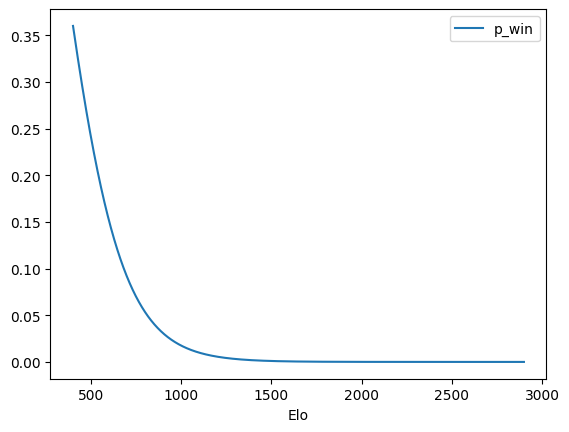

In [77]:
import matplotlib as plt
df_win_prob.plot.line(x='Elo', y='p_win')

In [78]:
### TEST CASE for Part 2.5: Plotting Your Winning Chances
_p = lambda a, b: 1 / (1 + 10 ** ((b - a) / 400))
assert("df_win_prob" in vars()), "Make sure to create the DataFrame `df_win_prob`."
assert("Elo" in df_win_prob and "p_win" in df_win_prob), "Make sure to have the columns `Elo` and `p_win` in your DataFrame."

assert(400 in df_win_prob.values ), "Your DataFrame does not have the Elo 400."
assert(2900 in df_win_prob.values ), "Your DataFrame does not have the Elo 2900."
assert(len(df_win_prob) == 2501), "Your DataFrame does not have the correct number of rows."

assert(set(df_win_prob.Elo) == set(range(400, 2900 + 1))), "Your DataFrame does not have the correct Elo values."
for i, row in df_win_prob.iterrows():
    assert(math.isclose(row.p_win, _p(your_elo, row.Elo))), f"Your DataFrame does not have the correct p_win value for Elo={row.Elo}."

print(f"{tada} All Tests Passed! {tada}") 

🎉 All Tests Passed! 🎉


<hr style="color: #DD3403;">

## Part 3: Probability vs. Reality

Let's take everything we've done and put it together!

- We have a function to calculate the probability of winning given two Elo ratings, and
- We have a dataset of games where we know which side won the game.

Let's find out if the Elo system really works in practice.

### Part 3.1: Decisive Games

Since our function doesn't allow for draws, filter the dataset to only include decisive (no draw) games. Store the result in a new DataFrame called `df_decisive`:

In [57]:
df_decisive = df[df['Result'] != '1/2-1/2']
df_decisive

,WhiteElo,BlackElo,Result,Termination,Opening,ECO,TimeControl
0,1639,1403,1-0,Normal,French Defense: Normal Variation,C00,600+8
1,1654,1919,1-0,Normal,"Queen's Pawn Game: Colle System, Anti-Colle",D04,480+2
2,1643,1747,1-0,Normal,Four Knights Game: Italian Variation,C50,420+17
3,1824,1973,0-1,Normal,Caro-Kann Defense: Goldman Variation,B12,60+1
4,1765,1815,0-1,Normal,French Defense: La Bourdonnais Variation,C00,60+1
...,...,...,...,...,...,...,...
121109,1854,1937,0-1,Normal,King's Indian Defense: Saemisch Variation,E80,600+10
121110,1500,1266,0-1,Time forfeit,Scandinavian Defense,B01,720+0
121111,1431,1523,0-1,Normal,Scandinavian Defense: Mieses-Kotroc Variation,B01,960+6
121112,1693,1479,1-0,Normal,Barnes Defense,B00,180+1


In [58]:
### TEST CASE for Part 3.1: Decisive Games
assert("df_decisive" in vars()), "Make sure to create the DataFrame `df_decisive`."
assert(set(df_decisive.Result.unique()) == {"1-0", "0-1"}), "Make sure to filter the DataFrame to only include decisive games."
print(f"{tada} All Tests Passed! {tada}") 

🎉 All Tests Passed! 🎉


### Part 3.2: Probability of White Winning

The code below creates a copy of your `df_decisive` DataFrame and adds a new column `p_win_white` that is the probability that white is expected to win the game given the Elo differences.  This code uses the `p_A_wins` you defined earlier and the `apply` function of the DataFrame.

Run the code to add the column:

In [59]:
df_decisive = df_decisive.copy(deep=True)
df_decisive["p_win_white"] = df_decisive.apply(lambda row: p_A_wins(row["WhiteElo"], row["BlackElo"]), axis=1)
df_decisive

,WhiteElo,BlackElo,Result,Termination,Opening,ECO,TimeControl,p_win_white
0,1639,1403,1-0,Normal,French Defense: Normal Variation,C00,600+8,0.795520
1,1654,1919,1-0,Normal,"Queen's Pawn Game: Colle System, Anti-Colle",D04,480+2,0.178659
2,1643,1747,1-0,Normal,Four Knights Game: Italian Variation,C50,420+17,0.354648
3,1824,1973,0-1,Normal,Caro-Kann Defense: Goldman Variation,B12,60+1,0.297817
4,1765,1815,0-1,Normal,French Defense: La Bourdonnais Variation,C00,60+1,0.428537
...,...,...,...,...,...,...,...,...
121109,1854,1937,0-1,Normal,King's Indian Defense: Saemisch Variation,E80,600+10,0.382775
121110,1500,1266,0-1,Time forfeit,Scandinavian Defense,B01,720+0,0.793641
121111,1431,1523,0-1,Normal,Scandinavian Defense: Mieses-Kotroc Variation,B01,960+6,0.370611
121112,1693,1479,1-0,Normal,Barnes Defense,B00,180+1,0.774148


### Part 3.3: Unlikely Upsets

Let's explore games that are **unlikely upsets**.  We'll define an **unlikely upset** to be a game where:

- Black wins (0-1) when there is at least a 90% probability that white was to win, **OR**
- White wins (1-0) when there is at least a 90% probability that black was to win

Find all the unlikely upsets in `df_decisive` and save it as a new DataFrame `df_upsets`:

In [81]:
df_upsets = df_decisive[
    ((df_decisive['Result'] == '0-1') & (df_decisive['p_win_white'] >= 0.9)) |
    ((df_decisive['Result'] == '1-0') & (df_decisive['p_win_white'] <= 0.1))
]
df_upsets

,WhiteElo,BlackElo,Result,Termination,Opening,ECO,TimeControl,p_win_white
310,1506,1914,1-0,Time forfeit,Hungarian Opening: Sicilian Invitation,A00,0+1,0.087174
348,1035,1608,1-0,Time forfeit,Van't Kruijs Opening,A00,480+16,0.035624
363,1502,1894,1-0,Normal,Hungarian Opening: Sicilian Invitation,A00,0+1,0.094787
427,1482,1899,1-0,Time forfeit,Queen's Pawn Game: Franco-Sicilian Defense,C00,0+1,0.083139
670,1068,1587,1-0,Normal,Center Game: Normal Variation,C22,300+4,0.047989
...,...,...,...,...,...,...,...,...
120687,1726,1204,0-1,Normal,King's Pawn Game: Wayward Queen Attack,C20,60+0,0.952794
120850,1682,1242,0-1,Normal,"French Defense: Classical Variation, Steinitz ...",C11,120+0,0.926412
120903,1832,1336,0-1,Time forfeit,Owen Defense,B00,300+0,0.945587
121048,1400,1800,1-0,Normal,Bishop's Opening: Berlin Defense,C24,300+0,0.090909


### Part 3.4: Likely Wins

To see how common unlikely upsets are, we need to also find out how often **likely wins** occurs.  We'll define an **likely win** to be a game where:

- White wins when there is at least a 90% probability that white was to win, **OR**
- Black wins when there is at least a 90% probability that black was to win

Find all the likely wins in `df_decisive` and save it as a new DataFrame `df_likely`:

In [82]:
df_likely = df_decisive[
    ((df_decisive['Result'] == '1-0') & (df_decisive['p_win_white'] >= 0.9)) |
    ((df_decisive['Result'] == '0-1') & (df_decisive['p_win_white'] <= 0.1))
]
df_likely

,WhiteElo,BlackElo,Result,Termination,Opening,ECO,TimeControl,p_win_white
62,1649,1242,1-0,Normal,Nimzo-Larsen Attack: Classical Variation,A01,60+0,0.912367
70,1220,1652,0-1,Time forfeit,English Defense #2,A40,60+0,0.076789
74,1499,1895,0-1,Normal,Italian Game: Anti-Fried Liver Defense,C55,660+0,0.092830
81,1203,1654,0-1,Normal,English Defense #2,A40,60+0,0.069386
93,1244,1857,0-1,Time forfeit,English Opening: Anglo-Indian Defense,A15,120+0,0.028506
...,...,...,...,...,...,...,...,...
121004,1500,1016,1-0,Time forfeit,"King's Pawn Game: Wayward Queen Attack, Kiddie...",C20,60+0,0.941922
121030,1057,1486,0-1,Normal,"Scotch Game: Scotch Gambit, Sarratt Variation",C44,60+2,0.078023
121041,1981,1234,1-0,Time forfeit,Queen's Gambit Accepted: Old Variation,D20,180+1,0.986614
121089,1578,2110,0-1,Normal,Owen Defense,B00,120+0,0.044684


### Puzzle 3.5: Percentage of Likely Wins

If our Elo formula is an accurate representation of a player's skill, among games where there's a 90% or greater chance for one side to win, that side should **actually win 90% of the time**.

Calculate the probability that there was an likely win given that there was a 90% or greater chance for one side to win (using df_likely and df_upset that you defined above), and store it as the variable `p_likely_win`.

In [83]:
P_likely_win = len(df_likely) / (len(df_likely) + len(df_upsets))
P_likely_win

0.899505766062603

In [84]:
### TEST CASE for Part 3: Probability vs. Reality
assert("df_likely" in vars()), "Make sure to create the DataFrame `df_decisive`."
assert(len(df_likely) == 7098), "Your `df_likely` is incorrect."
assert(len(df_upsets) == 793), "Your `df_upsets` is incorrect."
assert(math.isclose(P_likely_win, 0.899505766062603)), "Your `P_likely_win` is incorrect."

print(f"{tada} All Tests Passed! {tada}") 
print()
print(f"You calculated: P(likely win) = {round(P_likely_win * 100, 2)}% among all games in a month of chess!")
print("...this is almost exactly 90%, which highlights the Elo system seems to be working!")

🎉 All Tests Passed! 🎉

You calculated: P(likely win) = 89.95% among all games in a month of chess!
...this is almost exactly 90%, which highlights the Elo system seems to be working!


<hr style="color: #DD3403;">

## JKLMNOP: Just Keep Letting Me Nerd Out Please

This MicroProject contains just 0.1% of the games played **in just a single month** in the [lichess.org open database](https://database.lichess.org/), and the dataset available is absolutely huge!  If you enjoy the game of Chess, or looking for a technical puzzle, check out the database and nerd out with any of the billions of chess games available! :)

<hr style="color: #DD3403;">

## Submission

You're almost done!  All you need to do is to commit your lab to GitHub and run the GitHub Actions Grader:

1.  ⚠️ **Make certain to save your work.** ⚠️ To do this, go to **File => Save All**

2.  After you have saved, exit this notebook and return to https://discovery.cs.illinois.edu/microproject/chess/ and complete the section **"Commit and Grade Your Notebook"**.

3. If you see a 100% grade result on your GitHub Action, you've completed this MicroProject! 🎉
